<a href="https://colab.research.google.com/github/MarcoAlejandroSoto/phytonCasos/blob/main/Caso_3_Prueba_K_S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo
Realizar prueba estadística de Kolmogorov-Smirnov para distintos tipos de muestras
y llegar a interpretación y comparar resultados.

# Desarrollo



## Cargar librerías


In [ ]:
from scipy.stats import kstest, chi2, expon, norm

import numpy as np

import matplotlib.pyplot as plt



## Sembrando semilla para aleatoriedad

In [ ]:
np.random.seed(2023)  # Para reproducibilidad  que se generen los mismos datos

## Crear o construir los datos

### Crear datos bajo distribución chi cuadrada




In [ ]:
# Generar una muestra de datos que sigue una distribución Chi-cuadrado con 5 grados de libertad
muestra_datos_chi2 = np.random.chisquare(5, 30)  # 1000 puntos de datos
print ("Datos chi cuadrada")
print (muestra_datos_chi2)

Datos chi cuadrada
[ 9.45206153  1.14834915  0.65098407  5.80747831  3.74936371  5.62535627
  3.52981161  4.42222978  6.85146127  9.72101198  7.85931764  4.44178713
 12.34388827  3.71325173  4.49166724  8.2348728   4.11480485  5.15878701
  6.98902204  5.50705412  3.94090236  9.37295486  3.29441518  0.12384095
  2.6488941   4.50320631  8.76908658  5.59867998  8.24705766  2.51193359]


## Visualizar la densidad de los datos de la muestra

¿qué tipo de gráfica es la densidad?
¿cómo se observa?

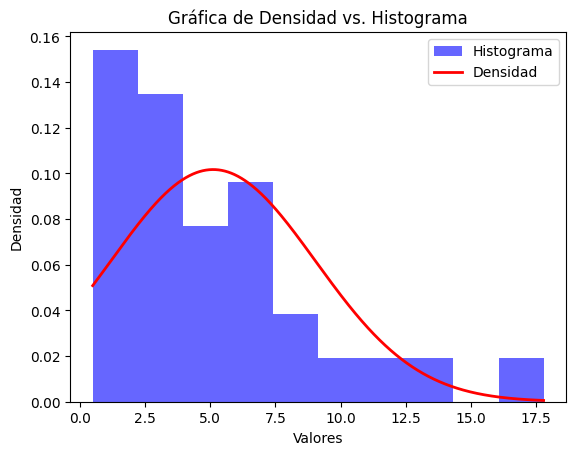

In [ ]:
# Crear un histograma
plt.hist(muestra_datos_chi2, bins=10, density=True, alpha=0.6, color='b', label='Histograma')

# Crear una gráfica de densidad
x = np.linspace(min(muestra_datos_chi2), max(muestra_datos_chi2), 1000)
density = (1.0 / (muestra_datos_chi2.std() * np.sqrt(2 * np.pi))) * np.exp(-(x - muestra_datos_chi2.mean())**2 / (2 * muestra_datos_chi2.std()**2))
plt.plot(x, density, 'r-', lw=2, label='Densidad')

# Configuración de la gráfica
plt.xlabel('Valores')
plt.ylabel('Densidad')
plt.title('Gráfica de Densidad vs. Histograma')
plt.legend()

# Mostrar la gráfica
plt.show()

La densidad de los datos y su histogrma representados visualmente en la gráfica anterior se parecen a una distribución chi cuadrada.



## Prueba de Kolmogorov-Smirnov

¿Son estos datos de tipo normal?
Visualmente se observa que no pero se requiere un estadístico que justifique la respuesta.

Para ello se declaran las hipótesis y se evalúa al 95% de confianza a dos colas.


## Realizar la prueba de Kolmovorov-Smirnov

Se devuelve el valor del estadístico de prueba y el estadístico *p.value*.

¿Qué significan estos estadísticos?

El estadístico de prueba se contrasta contra los valores críticos de una densidad normal y se verifica si la hipótesis nula H0 está en zona de aceptación o en zona de rechazo.

El estadístico *p.value* se compara contra el valor de alfa y se evalúa si es menor a este para rechazar H0 o aceptar H0.

In [ ]:
# Realiza la prueba de Kolmogorov-Smirnov
resultado = kstest(muestra_datos_chi2, 'norm')
estadistico_prueba = resultado[0]
p_value = resultado[1]

print ("Estadístico de prueba:", estadistico_prueba) # Estadístico
print ("p_value: ", p_value)   # p_value


Estadístico de prueba: 0.8537249687341832
p_value:  1.9794154200734608e-25


## Declarar valor de alfa, hipótesis nula y alternativa

Valor de significancia estadística de alfa. Se declara el valor del alfa al 95% (pero puede variar) el nivel de confianza:

$$
confianza = 0.95
$$

$$
alfa = 1 - confianza
$$

$$
\text{a dos colas}
$$

$$
significancia = alfa / 2 = 0.025
$$



## Declarar hipótesis nula y alternativa

Declarar Hipótesis nula y alternativa
Se declara hipótesis nula y alternativa y la decisión de aceptar o rechazar comparando el estadístico contra el valor de alfa.

Estas hipótesis  es similar para cualquier prueba de Kolmovorov-Smirnov

Hipótesis:

$$
H_0: \text{Los datos se comportan de manera normal}
$$

$$
H_a: \text{Los datos no se comporta de manera normal}
$$

### Criterios de evaluacion

Evaluar el valor del estadístico p.valor conra el valor de alfa

$$
Si (p.valor < alfa): \text{ Se rechaza Ho}
$$

$$
Si (p.valor >= alfa): \text{ Se acepta Ho}
$$


In [ ]:

# Estas hipótesis H0 y  Ha es similar para cualquier prueba de Kolmovorov-Smirnov
H0 = "Los datos SI provienen de una distribución normal"
Ha = "Los datos NO provienen de una distribución normal"
alfa = 0.05  # Nivel de significancia
significancia = alfa/2   # a dos colas

print ("Hipótesis nula: ", H0)
print ("Hipótesis alternativa: ", Ha)
print ("alfa: ", alfa)
print ("Significancia: ", significancia)

## Evaluar la prueba


In [ ]:
if (p_value < significancia):
  resultado = "Se rechaza H0. " + Ha
else:
  resultado = "Se acepta H0. " + H0
print(resultado)

Se rechaza H0. Los datos NO provienen de una distribución normal


## Generar unos datos de tipo exponencial



In [ ]:
muestra_datos_exp = np.random.exponential(scale=1.0, size=100)  # 1000 puntos de datos

print ("Datos Exponencial")
print (muestra_datos_exp)

Datos Exponencial
[4.72845869 0.37319146 2.16839478 1.1829541  0.05606754 0.22541968
 1.96010102 1.08103778 2.06189077 1.2864304  0.09644319 0.0222109
 0.20095284 0.32315055 1.11881482 0.84507502 0.47370156 0.33479181
 0.22648149 0.40187336 0.45340591 0.22640421 0.92370505 0.06502739
 1.31482219 1.32367337 0.89196463 1.26197747 1.24884871 1.49552586
 1.15217256 1.59898074 0.88913525 1.96410602 0.58378059 0.49099938
 0.33006974 0.10018502 0.56818417 1.12751409 0.28862389 0.41497399
 1.00908545 1.14251411 0.43113038 0.70513208 0.53085083 1.3558095
 0.15661244 1.31385228 0.72442586 0.40440071 2.59849004 3.62670457
 0.81993433 0.10746126 1.1149826  2.66949851 0.33576595 0.12541842
 1.89968675 1.18931281 2.29893878 2.8445239  0.72636484 1.18700984
 0.56471275 2.0709886  1.06447072 0.09626607 0.34733479 0.35216592
 0.40569581 0.12546422 0.89053481 0.66807775 0.10944996 0.34845785
 0.98638729 0.07630096 0.18448059 1.23013425 0.90280398 0.72218723
 0.76656997 0.29998753 1.09691598 0.02859939 1

## Visualizar la densidad de los datos de  la muestra

Ahora con los de tipo exponencial, ¿cómo se observa su densidad?, ¿es tipo gauss?


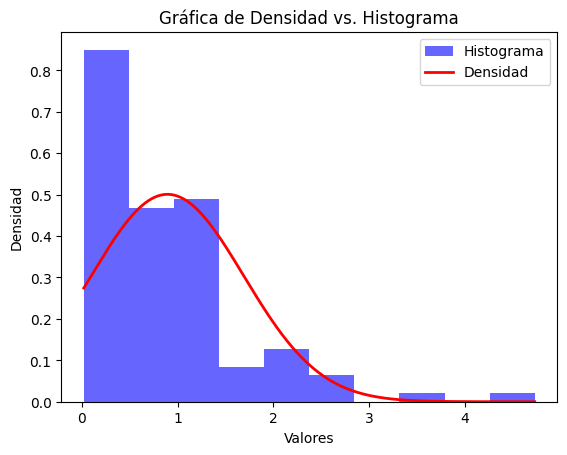

In [ ]:
# Crear un histograma
plt.hist(muestra_datos_exp, bins=10, density=True, alpha=0.6, color='b', label='Histograma')

# Crear una gráfica de densidad
x = np.linspace(min(muestra_datos_exp), max(muestra_datos_exp), 10000)
density = (1.0 / (muestra_datos_exp.std() * np.sqrt(2 * np.pi))) * np.exp(-(x - muestra_datos_exp.mean())**2 / (2 * muestra_datos_exp.std()**2))
plt.plot(x, density, 'r-', lw=2, label='Densidad')

# Configuración de la gráfica
plt.xlabel('Valores')
plt.ylabel('Densidad')
plt.title('Gráfica de Densidad vs. Histograma')
plt.legend()

# Mostrar la gráfica
plt.show()

## Realizar la prueba de Kolmogorov-Smirnov

Se devuelve el valor del estadístico de prueba y el estadístico p.value.

¿Qué significan estos estadísticos?

El estadístico de prueba se contrasta contra los valores críticos de una densidad normal y se verifica si la hipótesis nula H0 está en zona de aceptación o en zona de rechazo.

El estadístico *p.value* se compara contra el valor de alfa y se evalúa si es menor a este para rechazar H0 o aceptar H0.

In [ ]:
# Realiza la prueba de Kolmogorov-Smirnov
resultado = kstest(muestra_datos_exp, 'norm')
estadistico_prueba = resultado[0]
p_value = resultado[1]

print ("Estadístico de prueba:", estadistico_prueba) # Estadístico
print ("p_value: ", p_value)   # p_value


Estadístico de prueba: 0.5088601373960109
p_value:  1.5677417959739017e-24


## Evaluar la prueba

¿Cumplen con el criterio?

In [ ]:
if (p_value < significancia):
  resultado = "Se rechaza H0. " + Ha
else:
  resultado = "Se acepta H0. " + H0
print(resultado)

Se rechaza H0. Los datos NO provienen de una distribución normal


¿qué sucedería si los datos si provienen de una distribución normal?


## Simulando datos de tipo normal

Se crea una muestra de 100 estudiantes con calificaciones en donde la media es 85 y la desviación estándar es 5


In [ ]:
calificaciones = np.random.normal(loc=85, scale=4, size=40)
print("Calificaciones")
calificaciones


Calificaciones


array([88.71718158, 88.94933164, 84.16323853, 88.91078172, 87.76855036,
       80.80585273, 85.32115895, 86.96059869, 82.10048381, 80.22198996,
       90.82437991, 89.3185373 , 90.47682918, 89.65656996, 79.04298428,
       93.18880141, 78.41746901, 90.48282164, 89.87054099, 86.31740094,
       93.05565497, 84.69008296, 78.79982356, 85.13469524, 89.67895264,
       82.40665629, 85.99507438, 81.69999718, 86.61265597, 85.54374293,
       82.57899194, 86.26091778, 90.47744746, 82.81739081, 77.64646188,
       88.61841778, 91.3495672 , 79.62374734, 94.10661261, 84.33719459])

## Visualizar histograma y densidad de los datos


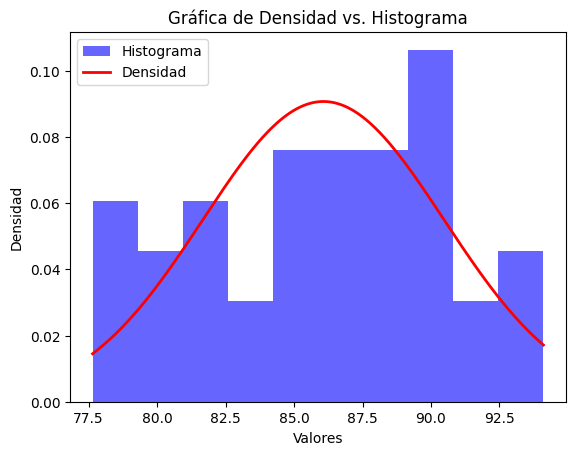

In [ ]:
# Crear un histograma
plt.hist(calificaciones, bins=10, density=True, alpha=0.6, color='b', label='Histograma')

# Crear una gráfica de densidad
x = np.linspace(min(calificaciones), max(calificaciones), 10000)
density = (1.0 / (calificaciones.std() * np.sqrt(2 * np.pi))) * np.exp(-(x - calificaciones.mean())**2 / (2 * calificaciones.std()**2))
plt.plot(x, density, 'r-', lw=2, label='Densidad')

# Configuración de la gráfica
plt.xlabel('Valores')
plt.ylabel('Densidad')
plt.title('Gráfica de Densidad vs. Histograma')
plt.legend()

# Mostrar la gráfica
plt.show()

Se observa una simétrica densidad en una aceptabla gráfica de de campana o "gauss". Pero, ¿la muestra de calificaciones proviene de una distribución normal?

Hay que hacer la prueba ...


## Prueba de Kolmogorov-Smirnov
Para los datos de calificaciones

In [ ]:
# Realiza la prueba de Kolmogorov-Smirnov
resultado = kstest(calificaciones, 'norm')
estadistico_prueba = resultado[0]
p_value = resultado[1]

print ("Estadístico de prueba:", estadistico_prueba) # Estadístico
print ("p_value: ", p_value)   # p_value

Estadístico de prueba: 1.0
p_value:  0.0


Siendo los datos construídos (datos pseudoaleatorios) a partir de una función de aleatoriedad de una distribución de tipo normal se esperaría que la prueba arrojara que si provienen de ua distribución normal, sin embargo, no es así.

El *p.value* no es menor que 0.05 e inclusive no es menor que 0.025 si fuese prueba a dos colas.

Habrá que hacer otras pruebas ....

Prueba de normalidad de Shapiro Wilk


# Interpretación

* ¿Qué es la prueba de Kolmovorov-Smirnof?
 Es una prueba estadística utilizada para determinar si una muestra de datos sigue una distribución de probabilidad conocida
* ¿Para qué se aplica la prueba de Kolmovorov-Smirnof?
Se utiliza para comparar dos muestras de datos y determinar si ambas provienen de la misma población subyacente.
* ¿Que valores arroja la prueba para evaluar si los datos provienen de una distribución normal?
 1.0 y 0.0
* ¿Qué datos se craron y evaluaron para este caso?
* ¿Todos los datos construídos en este caso, estadísticamente hablando provienen de una distribución normal?
si
* ¿Qué les deja el caso?
informacion de el como utlizar la prueba de K-S en datos estadisticos.

Alrededor de 100 palabras